In [1]:
using DataFrames
using Plots
using StatPlots
import CSV

In [2]:
const data_path = "data/toy_data"

Base.Nullable{S}, 

"data/toy_data"

Base.Nullable

In [ ]:
# load
#

include("src/CHMM.jl")

dfX = CSV.read(joinpath(data_path, "X.csv"), header=true, nullable=false)
Xfull = Matrix(dfX)
X = Matrix(dfX[[:velocity, :acceleration]])'

trajptr = readcsv(joinpath(data_path, "traj_ptr.csv"), Int) |> vec
pairsfull, _ = readcsv(joinpath(data_path, "pairs.csv"), Int, header=true)
pairsfull = pairsfull'
;

In [8]:
n_trajs = length(trajptr) - 1
n_pairs = size(pairsfull, 2)
n_obs = size(X, 2)

1903499


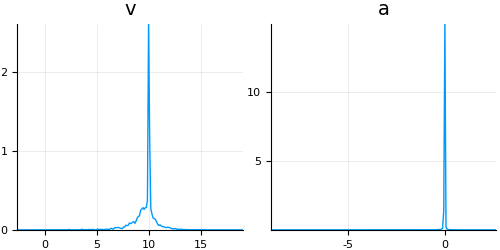

In [7]:
plot(
    plot(dfX[:velocity], seriestype=:density, title="v"),
    plot(dfX[:acceleration], seriestype=:density, title="a"),
    legend=false, size=(500, 250)
)

# Plot


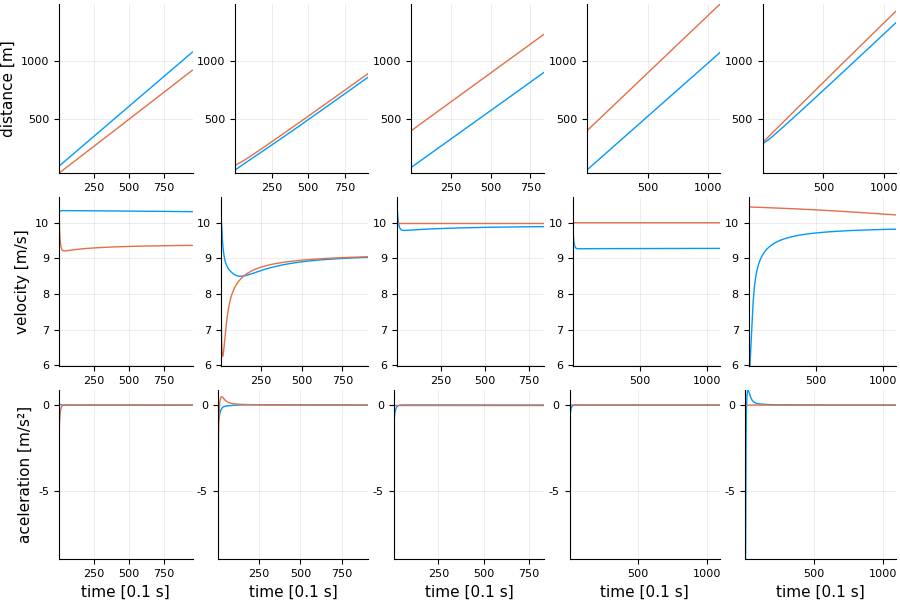

In [11]:
n_plot = 5
pairs_to_plot = randperm(n_pairs)[1:n_plot]
plts = Matrix{Any}(n_plot, 3)

for (i, p) in enumerate(pairs_to_plot)
    X1, X2 = get_pair_from_ptr(Xfull, pairsfull, p)
    
    plts[i, 1] = plot([X1[1, :] X2[1, :]],)
    plts[i, 2] = plot([X1[2, :] X2[2, :]],)
    plts[i, 3] = plot([X1[3, :] X2[3, :]],)
end
[xlabel!(plts[i, end], "time [0.1 s]") for i in 1:n_plot]
[ylabel!(plts[1, i], s) for (i, s) in 
        enumerate(["distance [m]", "velocity [m/s]", "aceleration [m/s²]"])]
plot((plts)..., legend=false, layout=(3, n_plot), link=:both, size=(900,600))

# CHMM

In [18]:
include("src/CHMM.jl")

chmm_em! (generic function with 1 method)

In [ ]:
X = X .* [1, 100] # scaling issue for acceleration
;

In [16]:
K = 3
curr = chmm_from_data(X, K)
orig_est = deepcopy(curr)
suff = ChmmSuffStats(curr)
;

In [ ]:
(curr, loglike_hist) = chmm_em!(curr, suff, X, trajptr, pairsfull; N_iters=250, print_every=10)
;

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] +(::Float64, ::UniformScaling{Float64}) at .\deprecated.jl:57
 [3] macro expansion at .\broadcast.jl:153 [inlined]
 [4] macro expansion at .\simdloop.jl:73 [inlined]
 [5] macro expansion at .\broadcast.jl:147 [inlined]
 [6] _broadcast! at .\broadcast.jl:139 [inlined]
 [7] broadcast_c! at .\broadcast.jl:211 [inlined]
 [8] broadcast! at .\broadcast.jl:204 [inlined]
 [9] update_parameter_estimates!(::Chmm, ::ChmmSuffStats, ::Array{Float64,1}, ::Array{Float64,2}, ::Float64) at C:\Users\Hamza El-Saawy\Documents\sisl\code\src\chmm_training.jl:319
 [10] #chmm_em!#80(::Int64, ::Float64, ::Bool, ::Int64, ::Function, ::Chmm, ::ChmmSuffStats, ::Array{Float64,2}, ::Array{Int64,1}, ::Array{Int64,2}) at C:\Users\Hamza El-Saawy\Documents\sisl\code\src\chmm_training.jl:391
 [11] (::#kw##chmm_em!)(::Array{Any,1}, ::#chmm_em!, ::Chmm, ::ChmmSuffStats, ::Array{Float64,2}, ::Array{Int64,1}, ::Array{Int64,2}) at .\<missing>:0
 [12] inc

iteration     10:  -

In [24]:
display.(curr.μs);

2-element Array{Float64,1}:
 10.3919
  0.0   

2-element Array{Float64,1}:
 11.3116
 -8.3275

2-element Array{Float64,1}:
 8.69039   
 0.00756329

In [25]:
display.(curr.Σs);

2×2 Array{Float64,2}:
 9.13957  0.0
 0.0      0.0

2×2 Array{Float64,2}:
 12.7336     7.199
  7.199   4472.0  

2×2 Array{Float64,2}:
  9.78758     -0.00219691
 -0.00219691   0.0155096 

In [26]:
isposdef.(curr.Σs)

3-element BitArray{1}:
 false
  true
  true